# FERTILIZER RECOMMENDATION SYSTEM FOR DISEASE PREDICTION 🍁

**DATASET COLLECTION**  📁

# Description of the dataset 📝

This dataset is created using offline augmentation from the original dataset. The original PlantVillage Dataset which we used in this project can be found [***here***](https://github.com/spMohanty/PlantVillage-Dataset).This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes. The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure. A new directory containing 33 test images is created later for prediction purpose.

In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os                       
import numpy as np            
import pandas as pd             
import torch                  
import matplotlib.pyplot as plt 
import torch.nn as nn          
from torch.utils.data import DataLoader 
from PIL import Image          
import torch.nn.functional as F 
import torchvision.transforms as transforms  
from torchvision.utils import make_grid       
from torchvision.datasets import ImageFolder  
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/PRI Final Project dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [ ]:
print(len(os.listdir('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')))
print(len(os.listdir('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid')))

38
38


In [ ]:
data_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [ ]:
print(diseases)

['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Bacterial_spot', 'Potato___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Blueberry___healthy', 'Strawberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___healthy', 'Potato___Late_blight', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_mosaic_virus', 'Grape___healthy', 'Apple___Apple_scab', 'Apple___Black_rot', 'Grape___Esca_(Black_Measles)', 'Potato___Early_blight', 'Squash___Powdery_mildew', 'Corn_(maize)___Common_rust_', 'Apple___Cedar_apple_rust', 'Corn_(maize)___Northern_Leaf_Blight', 'Apple___healthy', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Strawberry___Leaf_scorch', 'Soybean___healthy', 'Pepper,_bell___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Raspberry___healthy', 'Grape___Black_rot', 'Tomato___Target_Spot', 'Pepper,_bell___Bac

In [ ]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
print(f"Unique Plants are: \n{plants}")   # unique plants in the dataset

Unique Plants are: 
['Grape', 'Tomato', 'Potato', 'Corn_(maize)', 'Blueberry', 'Strawberry', 'Peach', 'Cherry_(including_sour)', 'Apple', 'Squash', 'Soybean', 'Pepper,_bell', 'Raspberry', 'Orange']


In [ ]:
print("Number of plants: {}".format(len(plants)))     #Number of plants

Number of plants: 14


In [ ]:
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


In [ ]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class


,no. of images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1722
Tomato___Bacterial_spot,1702
Potato___healthy,1824
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Blueberry___healthy,1816
Strawberry___healthy,1824
Tomato___Spider_mites Two-spotted_spider_mite,1741
Peach___Bacterial_spot,1838
Tomato___Septoria_leaf_spot,1745
Corn_(maize)___healthy,1859


Text(0.5, 1.0, 'Images per each class of plant disease')

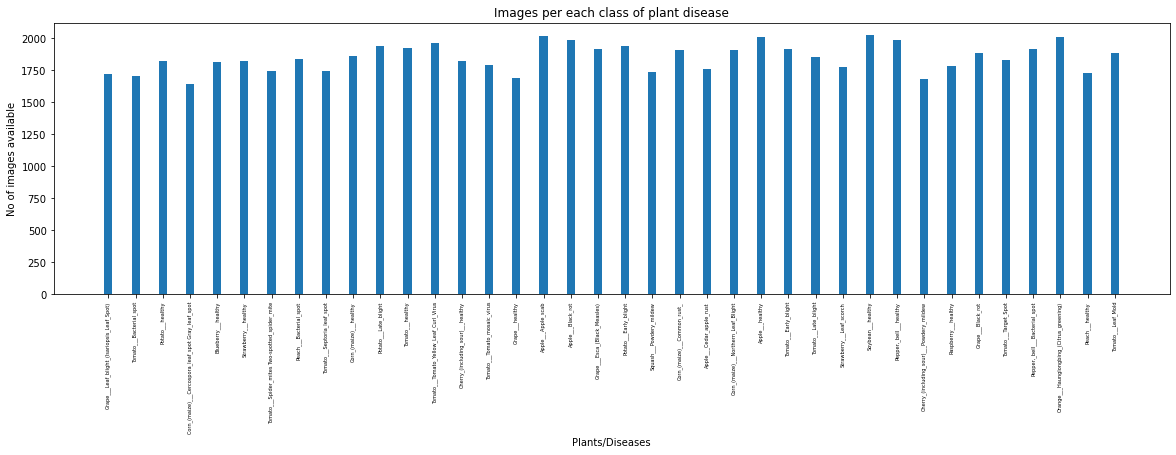

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')